# Modeling Polio Infections with Hypothetical Vaccination Dates

Project 1 

Katie B. & Michael R.


In [414]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# import read_csv to import data
from pandas import read_csv

# Question: How would changing the polio vaccine date change the number of polio infections?
We want

In [415]:
# Load our data as a table
filename = '../../Project 1/Polio Data.csv'
table = read_csv(filename, header=0, index_col=0, decimal='.')
len(table)
table.columns = ['infections', 'census']
# Show the first five rows of the imported data
table.head()

,infections,census
Year,,
1910,3043,92000000
1911,0,93343578
1912,574,94706778
1913,0,96089886
1914,0,97493193


In [416]:
def plot_results(series1,series1_label, series2, series2_label, title, x_label, y_label):
    """Plot two timeseries.
    
    series1: First timeSeries to plot
    series2: Second timeSeries to plot
    title: string
    """
    if len(series1):
        plot(series1, ':', label=series1_label)
    if len(series2):
        plot(series2, color='gray', label=series2_label)
    
    decorate(xlabel=x_label, 
             ylabel=y_label,
             title=title)

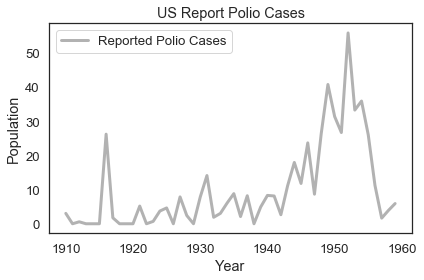

In [417]:
empty = TimeSeries()
actual = table.infections / 1e3
actual_sum = TimeSeries()
actual_sum = table.infections.cumsum()
plot_results(empty,'Empty', actual, 'Reported Polio Cases', 'US Report Polio Cases', 'Year','Population')

In [418]:
# Define initial conditions for all systems
# Start year
t_0 = get_first_label(census)
# End year
t_end = get_last_label(census)
# Init state containing the above, assuming no polio infections or deaths yet
init = State(model_infected=0)

,values
model_infected,0


In [419]:
system = System(polio_growth = 10286,
                t_0 = t_0,
                t_end = t_end,
                model_infected_0 = 0,
                init=init)

,values
polio_growth,10286
t_0,1910
t_end,1959
model_infected_0,0
init,model_infected 0 dtype: int64


# Proportional Growth Growth

In [420]:
def update_func1(state, t, system):
    """Update function for proportional infection rate accounting for deaths 
    
    state: state object
    t: year
    system: system object
        
    returns: state object
    """
    
    # Calculate the spread of polio, the resulting deaths, and who is left
    state.model_infected *= system.polio_growth
    
    return state.model_infected

In [427]:
# Init state containing the above, assuming no polio infections or deaths yet
init = State(model_infected=get_first_value(table.infections), p_dead_polios=0,actual_infected=0)
system = System(polio_growth = 1.12,
                t_0 = t_0,
                t_end = t_end,
                model_infected_0 = get_first_value(table.infections),
                init=init)

,values
polio_growth,1.12
t_0,1910
t_end,1959
model_infected_0,3043
init,model_infected 3043 p_dead_polios ...


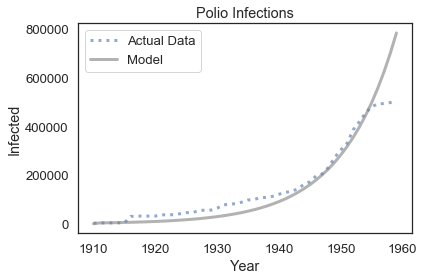

In [428]:
# Run the simulation (transpose the results so the index is first column, not first row)
results = run_simulation(system, update_func1)
# Plot the results
plot_results(actual_sum, 'Actual Data',results,'Model', 'Polio Infections','Year','Infected')

Yes.

# Introducing the Vaccine 

After some experimentation during the early 1950's, the polio vaccine was licensed and distributed on a wider scale in 1955. From 1953 to 1961, the number of reported cases dropped from 35,000 to just 161. Looking back at our input data, we see a very fast decent over this period:

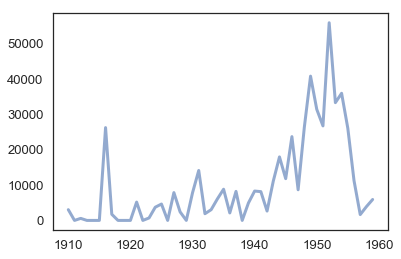

In [423]:
plot(table.infections);

One way to model the vaccine introduction is to set the growth rate to zero at a certain year. A new update function that does this is below.

In [424]:
def update_func2(state, t, system):
    """Update function for proportional infection rate accounting for deaths and vaccine introduction
    
    state: state object
    t: year
    system: system object
        
    returns: state object
    """
    
    # Add this year's cases to the running total, then account for deaths
    state.actual_infected += table.infections[t]
    
    # Calculate the spread of polio, the resulting deaths, and who is left
    # Decide what the growth rate is depending on the vaccination year, which is passed in system
    # The pre and post vaccination polio spread rates are passed in system now
    if t >= system.t_vax:
        growth = system.post_vax_growth
    else:
        growth = system.polio_growth
    state.model_infected *= growth
    
    return state.model_infected

In [425]:
# Init state containing the above, assuming no polio infections or deaths yet
init = State(model_infected=get_first_value(table.infections),actual_infected=0)
system = System(polio_growth = 1.12,
                post_vax_growth = 1.00,
                t_0 = t_0,
                t_end = t_end,
                t_vax = 1955,
                model_infected_0 = get_first_value(table.infections),
                init=init)

,values
polio_growth,1.12
post_vax_growth,1
t_0,1910
t_end,1959
t_vax,1955
model_infected_0,3043
init,model_infected 3043 actual_infected ...


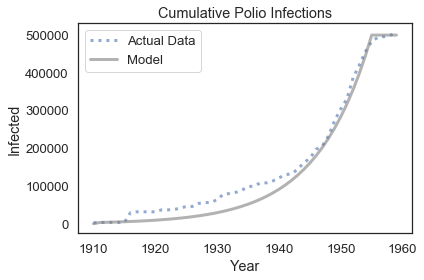

In [426]:
# Run the simulation (transpose the results so the index is first column, not first row)
results = run_simulation(system, update_func2)
# Plot the results
plot_results(actual_sum, 'Actual Data',results,'Model', 'Cumulative Polio Infections','Year','Infected')

In [431]:
results[1950] - results[1937]

217977

In [432]:
actual_sum[1950] - actual_sum[1937]

195562